# Goals ML-Supervised

### Goals : Do Data Understanding and Data Preparation for Autombile dataset for Predict Car Price

**Pada Homework kali ini lakukan proses Business Understanding -> Data Understanding -> Data Preparation pada Automobile_data.csv**


![Mobile](https://thinkingneuron.com/wp-content/uploads/2020/09/Car-price-prediction-case-study.png)
[Dataset](https://www.kaggle.com/toramky/automobile-dataset)

#### Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Import dataset

In [2]:
df = pd.read_csv(r'C:\Users\Ramadhoni\Documents\Bootcamp Data Scientist\Machine Learning\Automobile_data.csv')

**quick look**

In [3]:
pd.set_option('display.max_columns', 500)
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?


In [4]:
df.shape

(205, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [6]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


# Exploratory Data Analysis (EDA)

### Cleansing Data

**Check for Duplicates Data**

In [7]:
df= df.drop_duplicates()

In [8]:
df.drop_duplicates()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [9]:
df.shape

(205, 26)

**Missing Values and Data Type**

In [10]:
df['price'].unique()

array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', '?', '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8558', '8921', '12964', '6479', '6855',
       '5399', '6529', '7129', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '6785', '11048', '32250', '35550', '36000',
       '5195', '6095', '6795', '6695', '7395', '10945', '11845', '13645',
       '15645', '8495', '10595', '10245', '10795', '11245', '18280',
       '18344', '25552', '28248', '28176', '31600', '34184', '35056',
       '40960', '45400', '16503', '5389', '6189', '6669', '7689', '9959',
       '8499', '12629', '14869', '14489', '6989', '8189', '9279', '5499',
       '7099', '6649', '6849', '7349', '7299', '7799', '7499', '7999',
       '8249', '8949', '9549', '13499', '14399', '17199', '19699',
       '18399', '11900', '13200', '12440', '13860', '15580', '16900',


In [11]:
nama_kolom = list(df.columns)

In [12]:
kolom_tanda_tanya = []
for i in nama_kolom :
    if len(df[df[i]=='?']) > 0 :
        kolom_tanda_tanya.append(i)
print(kolom_tanda_tanya)

['normalized-losses', 'num-of-doors', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']


In [13]:
for i in kolom_tanda_tanya:
    print(i, len(df[df[i]=='?']))

normalized-losses 41
num-of-doors 2
bore 4
stroke 4
horsepower 2
peak-rpm 2
price 4


In [14]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [15]:
for i in kolom_tanda_tanya:
    df[i]= df[i].replace("?", np.nan)

In [16]:
len(kolom_tanda_tanya)

7

In [17]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [18]:
for i in kolom_tanda_tanya:
    print('Data Unik {}\n {}'.format(i,df[i].unique()))

Data Unik normalized-losses
 [nan '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
Data Unik num-of-doors
 ['two' 'four' nan]
Data Unik bore
 ['3.47' '2.68' '3.19' '3.13' '3.5' '3.31' '3.62' '2.91' '3.03' '2.97'
 '3.34' '3.6' '2.92' '3.15' '3.43' '3.63' '3.54' '3.08' nan '3.39' '3.76'
 '3.58' '3.46' '3.8' '3.78' '3.17' '3.35' '3.59' '2.99' '3.33' '3.7'
 '3.61' '3.94' '3.74' '2.54' '3.05' '3.27' '3.24' '3.01']
Data Unik stroke
 ['2.68' '3.47' '3.4' '2.8' '3.19' '3.39' '3.03' '3.11' '3.23' '3.46' '3.9'
 '3.41' '3.07' '3.58' '4.17' '2.76' '3.15' nan '3.16' '3.64' '3.1' '3.35'
 '3.12' '3.86' '3.29' '3.27' '3.52' '2.19' '3.21' '2.9' '2.07' '2.36'
 '2.64' '3.08' '3.5' '3.54' '2.87']
Data Unik horsepower
 ['111' '154' '102' '115' '110' '140' '160' '1

In [19]:
kolom_tanda_tanya_kategorik = kolom_tanda_tanya[1]
x = 1
kolom_tanda_tanya_numerik = kolom_tanda_tanya[:x] + kolom_tanda_tanya[x+1:]

In [20]:
kolom_tanda_tanya_kategorik
kolom_tanda_tanya_numerik

['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']

In [21]:
for i in kolom_tanda_tanya_numerik:
    df[i] = df[i].astype("float64")

**Make Some Visualization**

C:\Users\Ramadhoni\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


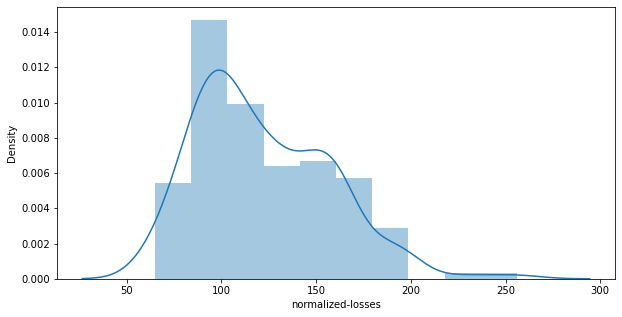

In [22]:
plt.figure(figsize=(10,5))
sns.distplot(df["normalized-losses"])
plt.show()

C:\Users\Ramadhoni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


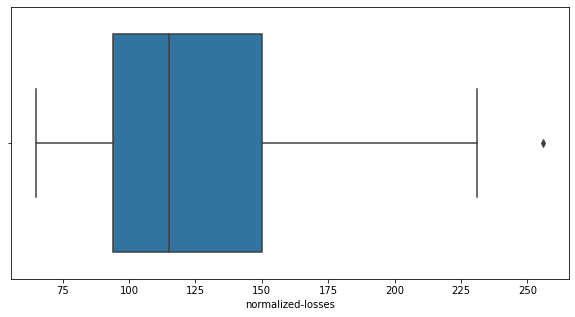

In [23]:
#detect outliers
plt.figure(figsize=(10,5))
sns.boxplot(df["normalized-losses"])
plt.show()

In [24]:
df[df["normalized-losses"]>225]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
106,1,231.0,nissan,gas,std,two,hatchback,rwd,front,99.2,178.5,67.9,49.7,3139,ohcv,six,181,mpfi,3.43,3.27,9.0,160.0,5200.0,19,25,18399.0
190,3,256.0,volkswagen,gas,std,two,hatchback,fwd,front,94.5,165.7,64.0,51.4,2221,ohc,four,109,mpfi,3.19,3.40,8.5,90.0,5500.0,24,29,9980.0


In [25]:
df["normalized-losses"] = df["normalized-losses"].fillna(df["normalized-losses"].median())

In [26]:
#See observation outliers on the totalcharges variable
Q1=df["normalized-losses"].quantile(0.25)
Q3=df["normalized-losses"].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
df.loc[(df["normalized-losses"]>upper_range),:]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
10,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16430.0
11,0,192.0,bmw,gas,std,four,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16925.0
104,3,194.0,nissan,gas,std,two,hatchback,rwd,front,91.3,170.7,67.9,49.7,3071,ohcv,six,181,mpfi,3.43,3.27,9.0,160.0,5200.0,19,25,17199.0
105,3,194.0,nissan,gas,turbo,two,hatchback,rwd,front,91.3,170.7,67.9,49.7,3139,ohcv,six,181,mpfi,3.43,3.27,7.8,200.0,5200.0,17,23,19699.0
106,1,231.0,nissan,gas,std,two,hatchback,rwd,front,99.2,178.5,67.9,49.7,3139,ohcv,six,181,mpfi,3.43,3.27,9.0,160.0,5200.0,19,25,18399.0
178,3,197.0,toyota,gas,std,two,hatchback,rwd,front,102.9,183.5,67.7,52.0,2976,dohc,six,171,mpfi,3.27,3.35,9.3,161.0,5200.0,20,24,16558.0
179,3,197.0,toyota,gas,std,two,hatchback,rwd,front,102.9,183.5,67.7,52.0,3016,dohc,six,171,mpfi,3.27,3.35,9.3,161.0,5200.0,19,24,15998.0
190,3,256.0,volkswagen,gas,std,two,hatchback,fwd,front,94.5,165.7,64.0,51.4,2221,ohc,four,109,mpfi,3.19,3.40,8.5,90.0,5500.0,24,29,9980.0


In [27]:
df.loc[(df["normalized-losses"]>upper_range),"normalized-losses"]=upper_range

<Figure size 720x360 with 0 Axes>

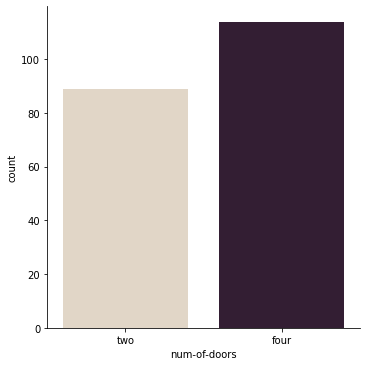

In [28]:
plt.figure(figsize=(10,5))
sns.catplot(x="num-of-doors", kind="count", palette="ch:.25", data=df)

In [29]:
df['num-of-doors'] = df['num-of-doors'].fillna(df['num-of-doors'].mode()[0])

In [30]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

C:\Users\Ramadhoni\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


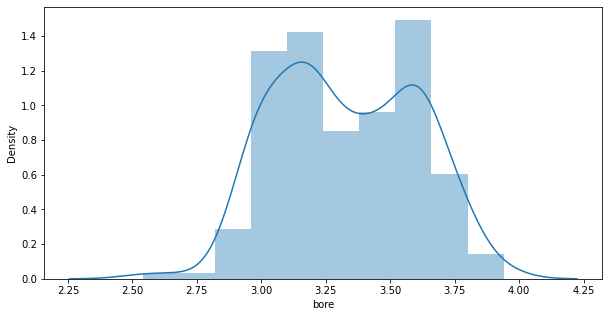

In [31]:
plt.figure(figsize=(10,5))
sns.distplot(df["bore"])
plt.show()

C:\Users\Ramadhoni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


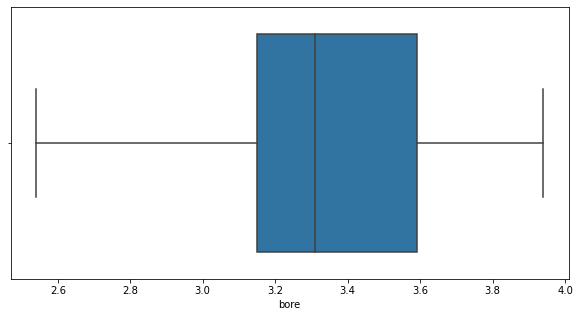

In [32]:
plt.figure(figsize=(10,5))
sns.boxplot(df["bore"])
plt.show()

In [33]:
df['bore'] = df['bore'].fillna(df['bore'].mean())

In [34]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

C:\Users\Ramadhoni\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


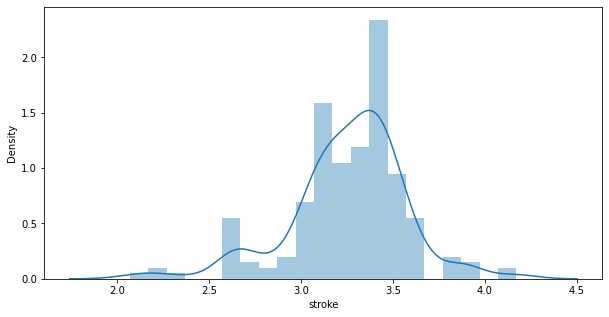

In [35]:
plt.figure(figsize=(10,5))
sns.distplot(df["stroke"])
plt.show()

C:\Users\Ramadhoni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


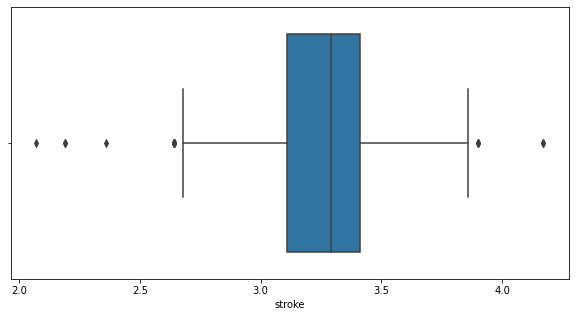

In [36]:
plt.figure(figsize=(10,5))
sns.boxplot(df["stroke"])
plt.show()

In [37]:
df['stroke'] = df['stroke'].fillna(df['stroke'].median())

In [38]:
#See observation outliers on the totalcharges variable
Q1_stroke=df["stroke"].quantile(0.25)
Q3_stroke=df["stroke"].quantile(0.75)
IQR_stroke=Q3_stroke-Q1_stroke
lower_range_stroke = Q1_stroke -(1.5 * IQR_stroke)
upper_range_stroke = Q3_stroke +(1.5 * IQR_stroke)
df.loc[(df["stroke"]>upper_range_stroke),:]
df.loc[(df["stroke"]<lower_range_stroke),:]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
111,0,161.0,peugot,gas,std,four,sedan,rwd,front,107.9,186.7,68.4,56.7,3075,l,four,120,mpfi,3.46,2.19,8.4,95.0,5000.0,19,24,15580.0
113,0,115.0,peugot,gas,std,four,wagon,rwd,front,114.2,198.9,68.4,56.7,3285,l,four,120,mpfi,3.46,2.19,8.4,95.0,5000.0,19,24,16695.0
134,3,150.0,saab,gas,std,two,hatchback,fwd,front,99.1,186.6,66.5,56.1,2707,ohc,four,121,mpfi,2.54,2.07,9.3,110.0,5250.0,21,28,15040.0
138,2,83.0,subaru,gas,std,two,hatchback,fwd,front,93.7,156.9,63.4,53.7,2050,ohcf,four,97,2bbl,3.62,2.36,9.0,69.0,4900.0,31,36,5118.0
139,2,83.0,subaru,gas,std,two,hatchback,fwd,front,93.7,157.9,63.6,53.7,2120,ohcf,four,108,2bbl,3.62,2.64,8.7,73.0,4400.0,26,31,7053.0
140,2,83.0,subaru,gas,std,two,hatchback,4wd,front,93.3,157.3,63.8,55.7,2240,ohcf,four,108,2bbl,3.62,2.64,8.7,73.0,4400.0,26,31,7603.0
141,0,102.0,subaru,gas,std,four,sedan,fwd,front,97.2,172.0,65.4,52.5,2145,ohcf,four,108,2bbl,3.62,2.64,9.5,82.0,4800.0,32,37,7126.0
142,0,102.0,subaru,gas,std,four,sedan,fwd,front,97.2,172.0,65.4,52.5,2190,ohcf,four,108,2bbl,3.62,2.64,9.5,82.0,4400.0,28,33,7775.0
143,0,102.0,subaru,gas,std,four,sedan,fwd,front,97.2,172.0,65.4,52.5,2340,ohcf,four,108,mpfi,3.62,2.64,9.0,94.0,5200.0,26,32,9960.0
144,0,102.0,subaru,gas,std,four,sedan,4wd,front,97.0,172.0,65.4,54.3,2385,ohcf,four,108,2bbl,3.62,2.64,9.0,82.0,4800.0,24,25,9233.0


In [39]:
df.loc[(df["stroke"]<lower_range_stroke),"stroke"] = lower_range_stroke
df.loc[(df["stroke"]>upper_range_stroke),"stroke"] = upper_range_stroke

In [40]:
df[df["stroke"]==upper_range_stroke]
df[df["stroke"]==lower_range_stroke]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
111,0,161.0,peugot,gas,std,four,sedan,rwd,front,107.9,186.7,68.4,56.7,3075,l,four,120,mpfi,3.46,2.66,8.4,95.0,5000.0,19,24,15580.0
113,0,115.0,peugot,gas,std,four,wagon,rwd,front,114.2,198.9,68.4,56.7,3285,l,four,120,mpfi,3.46,2.66,8.4,95.0,5000.0,19,24,16695.0
134,3,150.0,saab,gas,std,two,hatchback,fwd,front,99.1,186.6,66.5,56.1,2707,ohc,four,121,mpfi,2.54,2.66,9.3,110.0,5250.0,21,28,15040.0
138,2,83.0,subaru,gas,std,two,hatchback,fwd,front,93.7,156.9,63.4,53.7,2050,ohcf,four,97,2bbl,3.62,2.66,9.0,69.0,4900.0,31,36,5118.0
139,2,83.0,subaru,gas,std,two,hatchback,fwd,front,93.7,157.9,63.6,53.7,2120,ohcf,four,108,2bbl,3.62,2.66,8.7,73.0,4400.0,26,31,7053.0
140,2,83.0,subaru,gas,std,two,hatchback,4wd,front,93.3,157.3,63.8,55.7,2240,ohcf,four,108,2bbl,3.62,2.66,8.7,73.0,4400.0,26,31,7603.0
141,0,102.0,subaru,gas,std,four,sedan,fwd,front,97.2,172.0,65.4,52.5,2145,ohcf,four,108,2bbl,3.62,2.66,9.5,82.0,4800.0,32,37,7126.0
142,0,102.0,subaru,gas,std,four,sedan,fwd,front,97.2,172.0,65.4,52.5,2190,ohcf,four,108,2bbl,3.62,2.66,9.5,82.0,4400.0,28,33,7775.0
143,0,102.0,subaru,gas,std,four,sedan,fwd,front,97.2,172.0,65.4,52.5,2340,ohcf,four,108,mpfi,3.62,2.66,9.0,94.0,5200.0,26,32,9960.0
144,0,102.0,subaru,gas,std,four,sedan,4wd,front,97.0,172.0,65.4,54.3,2385,ohcf,four,108,2bbl,3.62,2.66,9.0,82.0,4800.0,24,25,9233.0


In [41]:
df["stroke"].unique()

array([2.68, 3.47, 3.4 , 2.8 , 3.19, 3.39, 3.03, 3.11, 3.23, 3.46, 3.86,
       3.41, 3.07, 3.58, 2.76, 3.15, 3.29, 3.16, 3.64, 3.1 , 3.35, 3.12,
       3.86, 3.27, 3.52, 2.66, 3.21, 2.9 , 3.08, 3.5 , 3.54, 2.87])

In [42]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

C:\Users\Ramadhoni\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


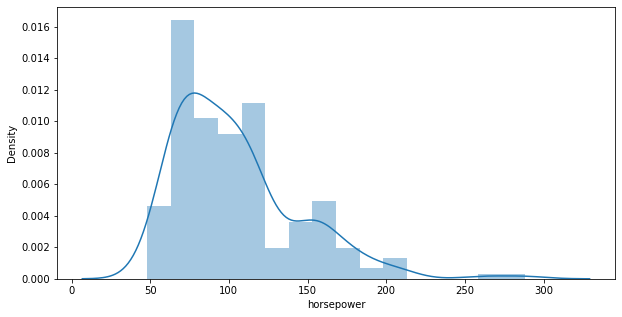

In [43]:
plt.figure(figsize=(10,5))
sns.distplot(df["horsepower"])
plt.show()

C:\Users\Ramadhoni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


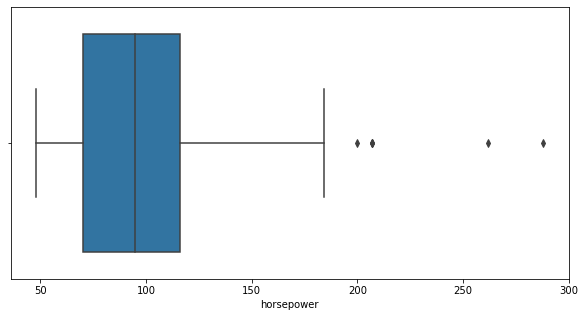

In [44]:
plt.figure(figsize=(10,5))
sns.boxplot(df["horsepower"])
plt.show()

In [45]:
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

In [46]:
#See observation outliers on the horsepower variable
Q1_horsepower=df["horsepower"].quantile(0.25)
Q3_horsepower=df["horsepower"].quantile(0.75)
IQR_horsepower=Q3_horsepower-Q1_horsepower
upper_range_horsepower = Q3_horsepower +(1.5 * IQR_horsepower)
df.loc[(df["horsepower"]>upper_range_horsepower),:]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
49,0,115.0,jaguar,gas,std,two,sedan,rwd,front,102.0,191.7,70.6,47.8,3950,ohcv,twelve,326,mpfi,3.54,2.76,11.5,262.0,5000.0,13,17,36000.0
105,3,191.0,nissan,gas,turbo,two,hatchback,rwd,front,91.3,170.7,67.9,49.7,3139,ohcv,six,181,mpfi,3.43,3.27,7.8,200.0,5200.0,17,23,19699.0
126,3,115.0,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,32528.0
127,3,115.0,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,34028.0
128,3,115.0,porsche,gas,std,two,convertible,rwd,rear,89.5,168.9,65.0,51.6,2800,ohcf,six,194,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,37028.0
129,1,115.0,porsche,gas,std,two,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366,dohcv,eight,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


In [47]:
df.loc[df['horsepower']>upper_range_horsepower, 'horsepower'] = upper_range_horsepower

In [48]:
df[df['horsepower']==upper_range_horsepower]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
49,0,115.0,jaguar,gas,std,two,sedan,rwd,front,102.0,191.7,70.6,47.8,3950,ohcv,twelve,326,mpfi,3.54,2.76,11.5,185.0,5000.0,13,17,36000.0
105,3,191.0,nissan,gas,turbo,two,hatchback,rwd,front,91.3,170.7,67.9,49.7,3139,ohcv,six,181,mpfi,3.43,3.27,7.8,185.0,5200.0,17,23,19699.0
126,3,115.0,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.90,9.5,185.0,5900.0,17,25,32528.0
127,3,115.0,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.90,9.5,185.0,5900.0,17,25,34028.0
128,3,115.0,porsche,gas,std,two,convertible,rwd,rear,89.5,168.9,65.0,51.6,2800,ohcf,six,194,mpfi,3.74,2.90,9.5,185.0,5900.0,17,25,37028.0
129,1,115.0,porsche,gas,std,two,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366,dohcv,eight,203,mpfi,3.94,3.11,10.0,185.0,5750.0,17,28,NaN


In [49]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

C:\Users\Ramadhoni\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

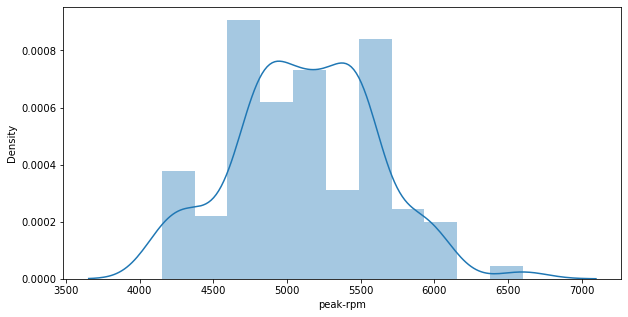

In [50]:
plt.figure(figsize=(10,5))
sns.distplot(df['peak-rpm'])
plt.show

C:\Users\Ramadhoni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

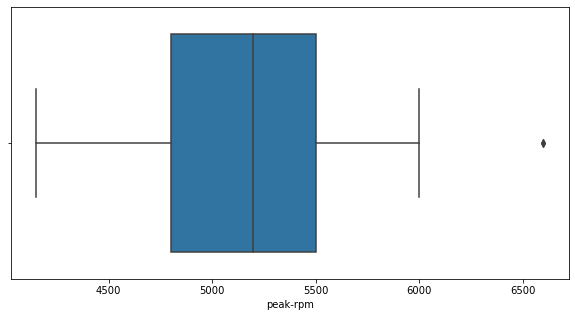

In [51]:
plt.figure(figsize=(10,5))
sns.boxplot(df['peak-rpm'])
plt.show

In [52]:
df['peak-rpm']= df['peak-rpm'].fillna(df['peak-rpm'].median())

In [53]:
#See observation outliers on the peak-rpm variable
Q1_peak_rpm=df["peak-rpm"].quantile(0.25)
Q3_peak_rpm=df["peak-rpm"].quantile(0.75)
IQR_peak_rpm=Q3_peak_rpm-Q1_peak_rpm
upper_range_peak_rpm = Q3_peak_rpm +(1.5 * IQR_peak_rpm)
df.loc[(df["peak-rpm"]>upper_range_peak_rpm),:]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
165,1,168.0,toyota,gas,std,two,sedan,rwd,front,94.5,168.7,64.0,52.6,2265,dohc,four,98,mpfi,3.24,3.08,9.4,112.0,6600.0,26,29,9298.0
166,1,168.0,toyota,gas,std,two,hatchback,rwd,front,94.5,168.7,64.0,52.6,2300,dohc,four,98,mpfi,3.24,3.08,9.4,112.0,6600.0,26,29,9538.0


In [54]:
df.loc[df['peak-rpm']>upper_range_peak_rpm, 'peak-rpm'] = upper_range_peak_rpm

In [55]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                4
dtype: int64

C:\Users\Ramadhoni\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

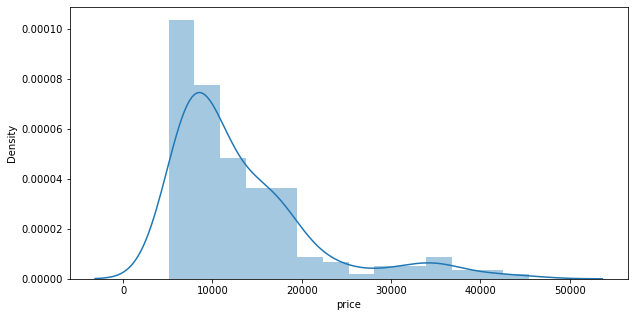

In [56]:
plt.figure(figsize=(10,5))
sns.distplot(df['price'])
plt.show

C:\Users\Ramadhoni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

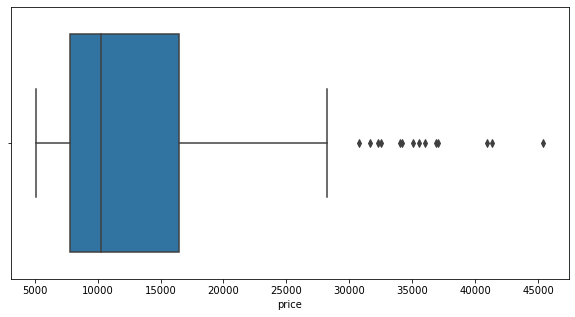

In [57]:
plt.figure(figsize=(10,5))
sns.boxplot(df['price'])
plt.show

In [58]:
df['price'] = df['price'].fillna(df['price'].median())

In [59]:
#See observation outliers on the price variable
Q1_price=df["price"].quantile(0.25)
Q3_price=df["price"].quantile(0.75)
IQR_price=Q3_price-Q1_price
upper_range_price = Q3_price +(1.5 * IQR_price)
df.loc[(df["price"]>upper_range_price),:]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
15,0,115.0,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3230,ohc,six,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,30760.0
16,0,115.0,bmw,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,six,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,41315.0
17,0,115.0,bmw,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,56.3,3505,ohc,six,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880.0
47,0,145.0,jaguar,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,52.8,4066,dohc,six,258,mpfi,3.63,3.86,8.1,176.0,4750.0,15,19,32250.0
48,0,115.0,jaguar,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,52.8,4066,dohc,six,258,mpfi,3.63,3.86,8.1,176.0,4750.0,15,19,35550.0
49,0,115.0,jaguar,gas,std,two,sedan,rwd,front,102.0,191.7,70.6,47.8,3950,ohcv,twelve,326,mpfi,3.54,2.76,11.5,185.0,5000.0,13,17,36000.0
70,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,202.6,71.7,56.3,3770,ohc,five,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,31600.0
71,-1,115.0,mercedes-benz,gas,std,four,sedan,rwd,front,115.6,202.6,71.7,56.5,3740,ohcv,eight,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,34184.0
72,3,142.0,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,180.3,70.5,50.8,3685,ohcv,eight,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,35056.0
73,0,115.0,mercedes-benz,gas,std,four,sedan,rwd,front,120.9,208.1,71.7,56.7,3900,ohcv,eight,308,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,40960.0


In [60]:
df.loc[df['price']>upper_range_price, 'price'] = upper_range_price

In [61]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

**Apakah tipe bahan bakar mempengaruhi harga?**

In [62]:
df_fuel_price = df[['fuel-type','price']]

In [63]:
df_fuel_price['TypeInt']=(df_fuel_price['fuel-type']=='gas').astype(int)

<ipython-input-63-1ba16f5fd172>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fuel_price['TypeInt']=(df_fuel_price['fuel-type']=='gas').astype(int)


In [64]:
df_fuel_price['TypeInt'].unique()

array([1, 0])

In [65]:
df_fuel_price

,fuel-type,price,TypeInt
0,gas,13495.0,1
1,gas,16500.0,1
2,gas,16500.0,1
3,gas,13950.0,1
4,gas,17450.0,1
...,...,...,...
200,gas,16845.0,1
201,gas,19045.0,1
202,gas,21485.0,1
203,diesel,22470.0,0


In [66]:
df_fuel_price_new = df_fuel_price.corr().reset_index()
df_fuel_price_new

,index,price,TypeInt
0,price,1.000000,-0.150982
1,TypeInt,-0.150982,1.000000


<AxesSubplot:>

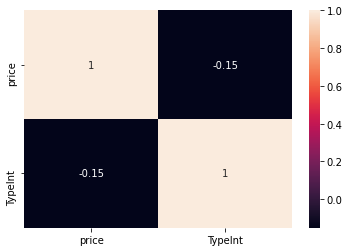

In [67]:
sns.heatmap(df_fuel_price.corr(),annot=True)

In [68]:
print('Dikarenakan hasil korelasi menunjukkan angka {}, hasil negatif tersebut menunjukkan hubungan terbalik tetapi sangat lemah/rendah, bahkan bisa dibilang tidak ada hubungan antara variable jenis bahan bakar & harga mobil, karena mendekati angka 0 ' .format(df_fuel_price_new.iloc[0,2]) )

Dikarenakan hasil korelasi menunjukkan angka -0.15098153072690845, hasil negatif tersebut menunjukkan hubungan terbalik tetapi sangat lemah/rendah, bahkan bisa dibilang tidak ada hubungan antara variable jenis bahan bakar & harga mobil, karena mendekati angka 0 


Tetapi jika dilihat dari harga rata-rata mobil dengan tipe bahan bakar, mobil dengan tipe bahan bakar diesel lebih mahal dibandingkan dengan mobil dengan tipe bahan bakar gas. Seperti visualisasi di bawah


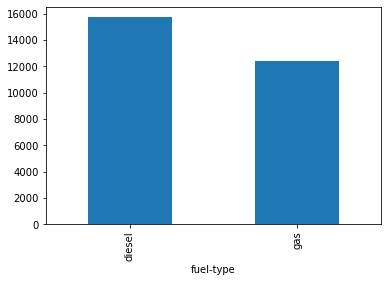

In [69]:
mean_fuel = df.groupby('fuel-type')['price'].mean()
mean_fuel.plot(kind = 'bar')
print('Tetapi jika dilihat dari harga rata-rata mobil dengan tipe bahan bakar, mobil dengan tipe bahan bakar diesel lebih mahal dibandingkan dengan mobil dengan tipe bahan bakar gas. Seperti visualisasi di bawah')

In [70]:
df_korelasi = df.corr().sort_values('price', ascending=False)
df_korelasi

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
price,-0.093034,0.125668,0.610357,0.718125,0.748692,0.165969,0.849468,0.828400,0.552330,0.079164,0.108667,0.791769,-0.113236,-0.697566,-0.718447,1.000000
curb-weight,-0.227691,0.065271,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648485,0.174624,0.151362,0.778054,-0.266652,-0.757414,-0.797465,0.849468
engine-size,-0.105790,0.069936,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583798,0.181779,0.028971,0.806523,-0.244434,-0.653658,-0.677470,0.828400
horsepower,0.064788,0.186690,0.403887,0.602304,0.649253,-0.065684,0.778054,0.806523,0.583759,0.112208,-0.228117,1.000000,0.114375,-0.839917,-0.819926,0.791769
width,-0.232919,0.063030,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559152,0.202040,0.181129,0.649253,-0.219145,-0.642704,-0.677218,0.748692
length,-0.357612,-0.003735,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606462,0.149667,0.158414,0.602304,-0.286814,-0.670909,-0.704662,0.718125
wheel-base,-0.531954,-0.071548,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488760,0.184464,0.249786,0.403887,-0.361742,-0.470414,-0.544082,0.610357
bore,-0.130083,-0.049251,0.488760,0.606462,0.559152,0.171101,0.648485,0.583798,1.000000,-0.089468,0.005201,0.583759,-0.254448,-0.584508,-0.586992,0.552330
height,-0.541038,-0.364713,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171101,-0.030733,0.261214,-0.065684,-0.321645,-0.048640,-0.107358,0.165969
normalized-losses,0.461559,1.000000,-0.071548,-0.003735,0.063030,-0.364713,0.065271,0.069936,-0.049251,0.056614,-0.114710,0.186690,0.245066,-0.190267,-0.147553,0.125668


Hubungan paling kuat dan positive dengan kolom Price adalah kolom Curb_weight yaitu 0.8494678029197588 hampir mendekati 1. ini menandakan  artinya jika satu nilai meningkat maka nilai yang lain secara linear akan meningkat. Seperti visualisasi di bawah 


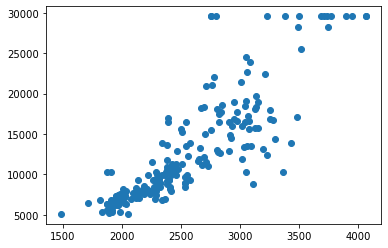

In [71]:
plt.scatter(df['curb-weight'], df['price'])
print('Hubungan paling kuat dan positive dengan kolom Price adalah kolom Curb_weight yaitu {} hampir mendekati 1. ini menandakan  artinya jika satu nilai meningkat maka nilai yang lain secara linear akan meningkat. Seperti visualisasi di bawah ' .format(df_korelasi.loc['price','curb-weight']))

Hubungan paling kuat dan negative dengan kolom Price adalah kolom highway-mpg yaitu -0.7184470371380598 hampir mendekati -1. ini menandakan jika satu nilai naik maka nilai yang lain akan secara linear menurun. Seperti visualisasi di bawah 


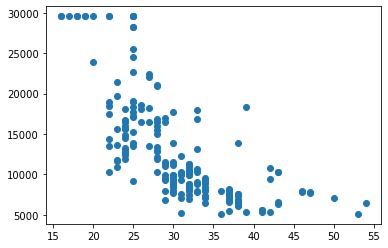

In [72]:
plt.scatter(df['highway-mpg'], df['price'])
print('Hubungan paling kuat dan negative dengan kolom Price adalah kolom highway-mpg yaitu {} hampir mendekati -1. ini menandakan jika satu nilai naik maka nilai yang lain akan secara linear menurun. Seperti visualisasi di bawah ' .format(df_korelasi.loc['price','highway-mpg']))

             make         price
7          jaguar  29568.000000
9   mercedes-benz  28727.000000
15        porsche  24203.400000
2             bmw  23587.375000
21          volvo  18063.181818
1            audi  16778.571429
10        mercury  16503.000000
0     alfa-romero  15498.333333
13         peugot  15489.090909
17           saab  15223.333333
8           mazda  10652.882353
12         nissan  10415.666667
20     volkswagen  10077.500000
19         toyota   9885.812500
6           isuzu   9605.750000
16        renault   9595.000000
11     mitsubishi   9239.769231
18         subaru   8541.250000
5           honda   8184.692308
14       plymouth   7963.428571
4           dodge   7875.444444
3       chevrolet   6007.000000 

Berdasarkan dataset tersebut, Harga rata-rata mobil termahal adalah merk jaguar dengan harga rata-rata 29568.0, sedangkan harga termurah adalah merk chevrolet dengan harga rata-rata 6007.0


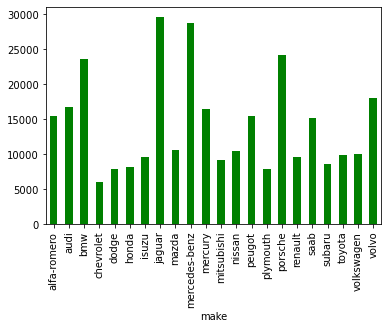

In [73]:
mean_make = df.groupby('make')['price'].mean()
mean_make_sort = mean_make.reset_index().sort_values(by='price', ascending= False)
print(mean_make_sort, '\n')
mean_make.plot(kind= 'bar', color = 'green')
print('Berdasarkan dataset tersebut, Harga rata-rata mobil termahal adalah merk {} dengan harga rata-rata {}, sedangkan harga termurah adalah merk {} dengan harga rata-rata {}' .format(mean_make_sort.iloc[0,0], mean_make_sort.iloc[0,1], mean_make_sort.iloc[-1,0],  mean_make_sort.iloc[-1,1]))

# Data Preparation

#### Encode Data

In [74]:
for i in nama_kolom:
    print(i, df[i].unique())
    


symboling [ 3  1  2  0 -1 -2]
normalized-losses [115. 164. 158. 191. 188. 121.  98.  81. 118. 148. 110. 145. 137. 101.
  78. 106.  85. 107. 104. 113. 150. 129.  93. 142. 161. 153. 125. 128.
 122. 103. 168. 108. 119. 154.  74. 186.  83. 102.  89.  87.  77.  91.
 134.  65.  90.  94.  95.]
make ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel-type ['gas' 'diesel']
aspiration ['std' 'turbo']
num-of-doors ['two' 'four']
body-style ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive-wheels ['rwd' 'fwd' '4wd']
engine-location ['front' 'rear']
wheel-base [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3  99.2
 107.9 114.2 108.   89.5  98.4  96.1  99.1  9

In [75]:
#Separating Numerical Columns except price
#symboling,normalized-losses,wheel-base,length ,width, height , curb-weight , engine-size , bore , stroke, compression-ratio, horsepower, peak-rpm,city-mpg, highway-mpg
num_cols = ['symboling','normalized-losses','wheel-base','length' ,'width', 'height' , 'curb-weight' , 'engine-size' , 'bore' , 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm','city-mpg', 'highway-mpg']
print(len(num_cols))
#Separating Biner category columns
#fuel-type, aspiration, num-of-doors, engine-location
bin_cols = ['fuel-type', 'aspiration', 'num-of-doors', 'engine-location']
print(len(bin_cols))
#Separating multi category columns
#make , body-style, drive-wheels, engine-type, num-of-cylinders ,fuel-system
multi_cols = ['make' , 'body-style', 'drive-wheels', 'engine-type', 'num-of-cylinders' ,'fuel-system']
print(len(multi_cols))

15
4
6


In [76]:
df.shape

(205, 26)

In [77]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#Label encoding Biner category columns
for i in bin_cols:
    df[i] = le.fit_transform(df[i])
#Label encoding for nominal multi category columns

df=pd.get_dummies(data = df,columns = multi_cols,drop_first=False)


In [78]:
df

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-type_dohc,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,num-of-cylinders_eight,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,115.0,1,0,1,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,3,115.0,1,0,1,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,115.0,1,0,1,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,2,164.0,1,0,0,0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,2,164.0,1,0,0,0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,1,0,0,0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
201,-1,95.0,1,1,0,0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
202,-1,95.0,1,0,0,0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
203,-1,95.0,0,1,0,0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


**Train Test Split**

In [79]:
from sklearn.model_selection import train_test_split
##partition data into data training and data testing
train,test = train_test_split(df, test_size = 0.20, random_state= 123)
##seperating dependent and independent variables on training and testing data
train_X = train.drop(labels = 'price' , axis = 1)
train_Y = train['price']
test_X = train.drop(labels = 'price' , axis = 1)
test_Y = train['price']

**Scaling**

Note : Lakukan scaling hanya pada data training

In [80]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
train_X[num_cols]=ss.fit_transform(test_X[num_cols])

In [81]:
from sklearn.preprocessing import MinMaxScaler


mms=MinMaxScaler()
train_X[num_cols]=mms.fit_transform(test_X[num_cols])

In [82]:
train_X

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-type_dohc,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,num-of-cylinders_eight,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
197,0.2,0.071429,1,0,0,0,0.516035,0.711940,0.575000,0.808333,0.602793,0.301887,0.885714,0.408333,0.15625,0.481752,0.520833,0.305556,0.315789,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
112,0.4,0.761905,0,1,0,0,0.620991,0.680597,0.675000,0.741667,0.684251,0.343396,0.828571,0.716667,0.87500,0.343066,0.000000,0.416667,0.447368,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
95,0.6,0.500000,1,0,1,0,0.230321,0.365672,0.291667,0.458333,0.209465,0.135849,0.435714,0.525000,0.15000,0.153285,0.437500,0.500000,0.552632,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
169,0.8,0.547619,1,0,1,0,0.344023,0.523881,0.441667,0.350000,0.412335,0.320755,0.771429,0.700000,0.14375,0.496350,0.270833,0.305556,0.368421,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
184,0.8,0.230159,0,0,0,0,0.311953,0.456716,0.433333,0.658333,0.301009,0.135849,0.335714,0.616667,1.00000,0.029197,0.270833,0.666667,0.789474,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,0.4,0.396825,1,0,0,0,0.682216,0.834328,0.883333,0.708333,0.782389,0.558491,0.771429,0.608333,0.06250,0.978102,0.520833,0.055556,0.105263,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
98,0.8,0.817460,1,0,1,0,0.247813,0.317910,0.291667,0.458333,0.201707,0.135849,0.435714,0.525000,0.15000,0.153285,0.437500,0.500000,0.552632,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
66,0.4,0.396825,0,0,0,0,0.533528,0.505970,0.483333,0.550000,0.470132,0.275472,0.635714,0.816667,0.93750,0.175182,0.020833,0.500000,0.605263,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
126,1.0,0.396825,1,0,1,1,0.084548,0.414925,0.391667,0.316667,0.491854,0.501887,0.857143,0.200000,0.15625,1.000000,0.729167,0.111111,0.236842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
